# <font color = 'red'> CICLO 1: END TO END </font>

# 0.0. IMPORTS

In [83]:
import random
import math
#import requests
#import pickle
import numpy   as np
import pandas  as pd
#import inflection
import seaborn as sns
#import xgboost as xgb
#import random
import warnings
warnings.filterwarnings( 'ignore' )

#from sklearn.preprocessing import OneHotEnconder
#from tabulate              import tabulate
from imblearn               import combine         as c
from imblearn               import over_sampling   as oversamp
from imblearn               import under_sampling  as us
from scipy                  import stats           as ss
from scikitplot             import metrics         as mt
from sklearn                import metrics         as m
from sklearn                import preprocessing   as pp
from keras                  import models          as ml
from keras                  import layers          as l
from sklearn                import model_selection as ms
from matplotlib             import pyplot          as plt
from IPython.display        import Image
from IPython.core.display   import HTML
#from boruta                import BorutaPy
#from sklearn.ensemble      import RandomForestRegressor
#from sklearn.metrics       import mean_absolute_error, mean_squared_error
#from sklearn.linear_model  import LinearRegression, Lasso
#from flask                 import Flask, request, Response

## 0.1. Helper Functions

In [2]:
#def cross_validation( x_training, kfold, model_name, model, verbose = False ) :
#    mae_list = []
#    mape_list = []
#    rmse_list = []
#    
#    
#    for k in reversed( range( 1, kfold+1 ) ):
#        if verbose:
#            print('\nKFold Number: {}'.format (k))
#        # Start and End date for validation
#        validation_start_date = x_training['date'].max() - datetime.timedelta( days=k*6*7)
#        validation_end_date = x_training['date'].max() - datetime.timedelta( days=(k-1)*6*7)
#        
#        # Filtering Dataset
#        training = x_training[x_training['date'] < validation_start_date]
#        validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]
#        
#        # training and validation dataset
#        # training
#        xtraining = training.drop(['date','sales'], axis = 1)
#        ytraining = training['sales']
#        
#        # validation
#        xvalidation = validation.drop(['date','sales'], axis = 1)
#        yvalidation = validation['sales']
#        
#        
#        # Model
#        m = model.fit(xtraining, ytraining)
#        
#        
#        # Prediction
#        yhat = m.predict(xvalidation)
#        
#        
#        
#        # Performance
#        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )
#        
#        # store performance of each kfold iteration
#        mae_list.append (m_result['MAE'])
#        mape_list.append (m_result['MAPE'])
#        rmse_list.append (m_result['RMSE'])
#        
#    return pd.DataFrame({'Model Name': model_name,
#                         'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
#                         'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
#                         'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index = [0] )
#
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    

def cramer_v( x, y):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r,k = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / (min(kcorr-1, rcorr-1) ) )

#def mean_percentage_error( y,yhat ):
#    return np.mean( ( y-yhat ) / y  )
#
#def mean_absolute_percentage_error( y,yhat ):
#    return np.mean(np.abs( ( y-yhat )/y ) )
#
#
#def ml_error(model_name, y, yhat):
#    mae = mean_absolute_error(y,yhat)
#    mape = mean_absolute_percentage_error(y,yhat)
#    rmse = np.sqrt(mean_squared_error(y,yhat))
#    
#    return pd.DataFrame ({'Model Name': model_name,
#                          'MAE': mae,
#                          'MAPE': mape,
#                          'RMSE': rmse}, index = [0])
#

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
df_raw = pd.read_csv('C:/Users/leonardo.faria/repos/airbnb-predict/datasets/training_users.csv', low_memory=True )
df_raw.shape

(213451, 16)

In [5]:
df_sessions = pd.read_csv('C:/Users/leonardo.faria/repos/airbnb-predict/datasets/sessions.csv', low_memory=True )
df_sessions.shape

(10567737, 6)

# 1.0. DESCRIÇÃO DOS DADOS

In [6]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [7]:
print('Number or rows: {}'.format(df1.shape[0] ) )
print('Number or columns: {}'.format(df1.shape[1] ) )

Number or rows: 213451
Number or columns: 16


In [8]:
print('Number or rows: {}'.format(df_sessions.shape[0] ) )
print('Number or columns: {}'.format(df_sessions.shape[1] ) )

Number or rows: 10567737
Number or columns: 6


## 1.2. Data Types

In [9]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [10]:
# Verificar se as colunas estão com os Data Types corretos
df1.sample()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
98711,wkwv7ko2gy,2013-08-12,20130812190803,NaN,FEMALE,41.0,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,NDF


In [11]:
df_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 1.3. Check NA

### 1.3.1. Training Users

In [12]:
df1.isna().sum() / len( df1 )

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [13]:
aux = df1[df1['date_first_booking'].isna()]
aux['country_destination'].value_counts( normalize= True )

NDF    1.0
Name: country_destination, dtype: float64

In [14]:
# remove missing value completly
#df1 = df1.dropna()

# date_first_booking
date_first_booking_max = pd.to_datetime( df1['date_first_booking'] ).max().strftime( '%Y-%m-%d' )
df1['date_first_booking'] = df1['date_first_booking'].fillna( date_first_booking_max )

# age
df1 = df1[(df1['age'] >= 15) & (df1['age'] <= 120)]
avg_age = df1['age'].mean().astype( np.int64 )
df1['age'] = df1['age'].fillna( avg_age )


# first_affiliate_tracked
df1 = df1[~df1['first_affiliate_tracked'].isna()]


#df1.shape

In [15]:
df1.isna().sum() / len( df1 )

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

### 1.3.2. Sessions

In [16]:
df_sessions.isna().sum() / len( df_sessions )

user_id          0.003264
action           0.007535
action_type      0.106570
action_detail    0.106570
device_type      0.000000
secs_elapsed     0.012872
dtype: float64

In [17]:
# remove missing value completly
# user_id
df_sessions = df_sessions[~df_sessions['user_id'].isna()]

# action
df_sessions = df_sessions[~df_sessions['action'].isna()]

# action_type
df_sessions = df_sessions[~df_sessions['action_type'].isna()]

# action_detail
df_sessions = df_sessions[~df_sessions['action_detail'].isna()]

# secs_elapsed
df_sessions = df_sessions[~df_sessions['secs_elapsed'].isna()]


In [18]:
df_sessions.isna().sum() / len( df_sessions )

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

## 1.4. Change Data Types

In [19]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [20]:
# date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format= '%Y%m%d%H%M%S' )


# date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )


# age
df1['age'] = df1['age'].astype( np.int64 )



## 1.5. Check Balanced Data

In [21]:
df1['country_destination'].value_counts(normalize=True)

NDF      0.447286
US       0.391866
other    0.061242
FR       0.029916
IT       0.016422
GB       0.014334
ES       0.013739
CA       0.008676
DE       0.006857
NL       0.004851
AU       0.003531
PT       0.001280
Name: country_destination, dtype: float64

## 1.6. Descriptive Analysis

### 1.6.1 General

In [22]:
# Users
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )
time_attributes = df1.select_dtypes( include=['datetime64[ns]'] )

# Sessions
num_attributes_sessions = df_sessions.select_dtypes( include=['int64', 'float64'] )
cat_attributes_sessions = df_sessions.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )
time_attributes_sessions = df_sessions.select_dtypes( include=['datetime64[ns]'] )

#### 1.6.1.1. Numerical - Users

In [23]:
# Central Tendency - Mean, Mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) )
ct2 = pd.DataFrame( num_attributes.apply( np.median ) )

# Dispersions - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) )
d2 = pd.DataFrame( num_attributes.apply( min ) )
d3 = pd.DataFrame( num_attributes.apply( max ) )
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) )
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) )
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) )

# Concatenate
ct = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6], axis=1 ).reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,15,115,100,37.404129,34.0,13.940563,2.089302,6.515193
1,signup_flow,0,25,25,2.519553,0.0,6.604820,2.705842,5.928076


#### 1.6.1.2. Categorical - Users

In [24]:
cat_attributes.drop( 'id', axis=1 ).describe()

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,122644,122644,122644,122644,122644,122644,122644,122644,122644,122644
unique,4,3,25,8,17,7,4,9,41,12
top,FEMALE,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,56363,66042,118212,79098,78959,64716,108290,57945,41779,54857


#### 1.6.1.3. Numerical - Sessions

In [25]:
# Central Tendency - Mean, Mediana
ct1 = pd.DataFrame( num_attributes_sessions.apply( np.mean ) )
ct2 = pd.DataFrame( num_attributes_sessions.apply( np.median ) )

# Dispersions - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame( num_attributes_sessions.apply( np.std ) )
d2 = pd.DataFrame( num_attributes_sessions.apply( min ) )
d3 = pd.DataFrame( num_attributes_sessions.apply( max ) )
d4 = pd.DataFrame( num_attributes_sessions.apply( lambda x: x.max() - x.min() ) )
d5 = pd.DataFrame( num_attributes_sessions.apply( lambda x: x.skew() ) )
d6 = pd.DataFrame( num_attributes_sessions.apply( lambda x: x.kurtosis() ) )

# Concatenate
ct_sessions = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6], axis=1 ).reset_index()
ct_sessions.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct_sessions

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,secs_elapsed,0.0,1799977.0,1799977.0,19961.8251,1369.0,88849.388449,11.137761,154.84312


#### 1.6.1.4. Categorical - Sessions

In [26]:
cat_attributes_sessions.drop( 'user_id', axis=1 ).describe()

,action,action_type,action_detail,device_type
count,9213930,9213930,9213930,9213930
unique,347,10,155,14
top,show,view,view_search_results,Mac Desktop
freq,2178382,3545621,1770931,3019523


In [27]:
# list of attributes for Cramer V correlation
cat_attributes_list = cat_attributes_sessions.drop( 'user_id', axis=1 ).columns.tolist()

corr_dict = {}
for i in range( len( cat_attributes_list ) ):
    corr_list = []
    for j in range ( len( cat_attributes_list ) ):
        ref = cat_attributes_list[i]
        feat = cat_attributes_list[j]
        
        # correlation
        corr = cramer_v( cat_attributes_sessions[ ref ], cat_attributes_sessions[ feat ] )
        
        # append a list
        corr_list.append( corr )
    
    # append a correlation list for each ref attributes
    corr_dict[ ref ] = corr_list


<AxesSubplot:>

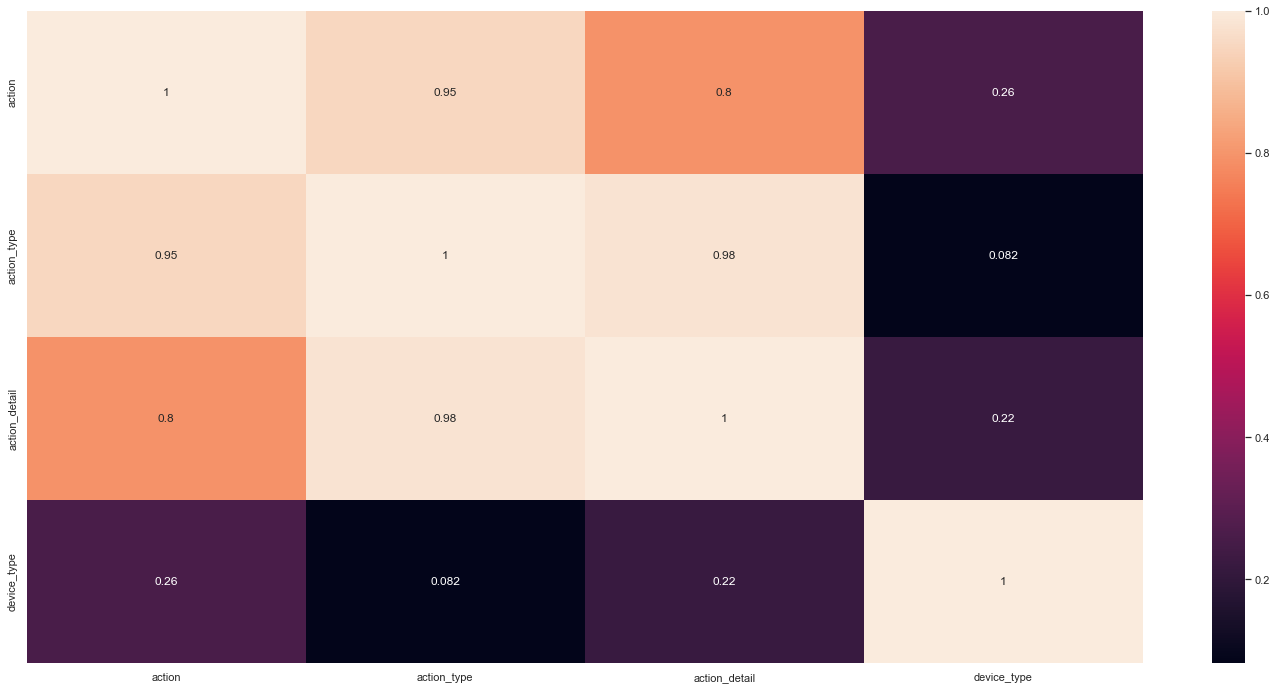

In [28]:
d = pd.DataFrame( corr_dict )
d = d.set_index( d.columns )
sns.heatmap( d, annot=True )

# 2.0. Feature Engineering

In [29]:
df2 = df1.copy()

## 2.1. Create New Features

In [30]:
# days from first active up to first booking
df2['first_active'] = pd.to_datetime( df2['timestamp_first_active'].dt.strftime( '%Y-%m-%d' ) )
df2['days_from_first_active_until_booking'] = ( df2['date_first_booking'] - df2['first_active'] ).apply( lambda x: x.days )

# days from first active up to account created
df2['days_from_first_active_until_account_created'] = ( df2['date_account_created'] - df2['first_active'] ).apply( lambda x: x.days )


# days from account created up to first booking
df2['days_from_account_created_until_first_booking'] = (  df2['date_first_booking'] - df2['date_account_created'] ).apply( lambda x: x.days )

# ========================= First Active =========================

# year first active
df2['year_first_active'] = df2['first_active'].dt.year

# month  first active
df2['month_first_active'] = df2['first_active'].dt.month

# day  first active
df2['day_first_active'] = df2['first_active'].dt.day

# day of week first active
df2['day_of_week_first_active'] = df2['first_active'].dt.dayofweek

# week of year first active
df2['week_of_year_first_active'] = df2['first_active'].dt.weekofyear



# ========================= First Booking =========================


# year first booking
df2['year_first_booking'] = df2['date_first_booking'].dt.year

# month first booking
df2['month_first_booking'] = df2['date_first_booking'].dt.month

# day first booking
df2['day_first_booking'] = df2['date_first_booking'].dt.day

# day of week first booking
df2['day_of_week_first_booking'] = df2['date_first_booking'].dt.dayofweek

# week of year first booking
df2['week_of_year_first_booking'] = df2['date_first_booking'].dt.weekofyear


# ========================= First Account Created =========================


# year first booking
df2['year_account_created'] = df2['date_account_created'].dt.year

# month first booking
df2['month_account_created'] = df2['date_account_created'].dt.month

# day first booking
df2['day_account_created'] = df2['date_account_created'].dt.day

# day of week first booking
df2['day_of_week_account_created'] = df2['date_account_created'].dt.dayofweek

# week of year first booking
df2['week_of_year_account_created'] = df2['date_account_created'].dt.weekofyear



# 3.0. DATA FILTERING

In [31]:
df3 = df2.copy()

## 3.1. Filtering Rows

In [32]:
# Filtering rows:
# age - There are fer people over 120 year old
df3 = df3[(df3['age'] >= 15) & (df3['age'] <= 120)]

# secs_elapsed - there is no possible 0 secs elapsed on website
#df3 = df3[df3'secs_elapsed'] > 0]

## 3.2. Columns Selection Rows

In [52]:
cols_to_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking', 'first_active'] # original datetime
df3 = df3.drop( cols_to_drop, axis=1 )

# 4.0. Balanced Dataset

In [68]:
df4 = df3.copy()

In [91]:
# Encoder Categorical Variable
ohe = pp.OneHotEncoder()

# Numerical
col_num = df4.select_dtypes( include=['int64', 'float64'] ).columns.tolist()

# Categorical
col_cat = df4.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'] ).drop( ['id', 'country_destination'], axis=1 ).columns.tolist()

# Encoding
df4_dummy = pd.DataFrame( ohe.fit_transform( df4[col_cat] ).toarray(), index=df4.index )

# Join numerical and categorical
df42 = pd.concat( [df4[col_num], df4_dummy], axis=1 )


In [69]:
df41 = df4.drop( 'id', axis=1 )

## 4.1. Random Undersampling

In [93]:
# Ratio balanced
ratio_balanced = {'NDF': 10000}

# Define sampler                                           # majority / all
undersampling = us.RandomUnderSampler( sampling_strategy = ratio_balanced, random_state = 32 )


# Apply sampler
x_under, y_under = undersampling.fit_resample( df42, df4['country_destination'] )


In [94]:
df41['country_destination'].value_counts()

NDF      54857
US       48060
other     7511
FR        3669
IT        2014
GB        1758
ES        1685
CA        1064
DE         841
NL         595
AU         433
PT         157
Name: country_destination, dtype: int64

In [95]:
y_under.value_counts()

US       48060
NDF      10000
other     7511
FR        3669
IT        2014
GB        1758
ES        1685
CA        1064
DE         841
NL         595
AU         433
PT         157
Name: country_destination, dtype: int64

## 4.2. Random Oversampling

In [96]:
# Ratio balanced
#ratio_balanced = {'NDF': 10000}

# Define sampler
oversampling = oversamp.RandomOverSampler( sampling_strategy = 'all', random_state = 32 )


# Apply sampler
x_over, y_over = oversampling.fit_resample( df42, df4['country_destination'] )


In [97]:
df41['country_destination'].value_counts()

NDF      54857
US       48060
other     7511
FR        3669
IT        2014
GB        1758
ES        1685
CA        1064
DE         841
NL         595
AU         433
PT         157
Name: country_destination, dtype: int64

In [98]:
y_over.value_counts()

NDF      54857
US       54857
other    54857
CA       54857
FR       54857
IT       54857
ES       54857
GB       54857
NL       54857
DE       54857
AU       54857
PT       54857
Name: country_destination, dtype: int64

## 4.3. SMOTE + TOMEKLINK

In [103]:
len( df4['country_destination'] )

122644

In [105]:
40000/7511

5.325522566901877

In [106]:
ratio_balanced = {'NDF': 54857,
                  'US': 48060,
                  'other': 6*7511,
                  'FR': 12*3669,
                  'IT': 20*2014,
                  'GB': 30*1758,
                  'ES': 30*1685,
                  'CA': 40*1064,
                  'DE': 45*841,
                  'NL': 80*595,
                  'AU': 85*433,
                  'PT': 300*157}
ratio_balanced

{'NDF': 54857,
 'US': 48060,
 'other': 45066,
 'FR': 44028,
 'IT': 40280,
 'GB': 52740,
 'ES': 50550,
 'CA': 42560,
 'DE': 37845,
 'NL': 47600,
 'AU': 36805,
 'PT': 47100}

In [100]:
# define sampler                        # auto
smt = c.SMOTETomek( sampling_strategy = ratio_balanced, random_state = 32, n_jobs = -1 )

# apply sampler
X_smt, Y_smt = smt.fit_resample( df42, df4['country_destination'] )

KeyboardInterrupt: 

In [ ]:
# numerical data
df43 = X_smt[col_num]

# categorical data
df44 = X_smt.drop( col_num, axis=1 )
df45 = pd.DataFrame( ohe.inverse_transform( df44 ), columns=col_cat, index=df44.index )

# join numerical and categorical
df46 = pd.concat( [df43, df45], axis=1 )
df46['country_destination'] = y_smt

# 5.0. Data Preparation

In [33]:
df5 = df4.copy()

In [34]:
# dummy variable
df5_dummy = pd.get_dummies( df5.drop( ['id', 'country_destination'], axis=1 ) )

# join id and country destination
df5 = pd.concat( [df5[['id', 'country_destination']], df5_dummy], axis=1 )

# 6.0. FEATURE SELECTION

In [35]:
# Drop de colunas date porque sao irrelevantes ao projeto
#cols_drop = ['date_account_created','timestamp_first_active','date_first_booking', 'first_active'] # original dates
df6 = df5.copy()#( cols_drop, axis= 1 )

In [36]:
X = df6.drop( 'country_destination', axis=1 )
y = df6['country_destination'].copy()

In [37]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 )

# 7.0. MACHINE LEARNING MODEL

In [38]:
x_train = X_train.drop( 'id', axis=1 )
x_test = X_test.drop( 'id', axis=1 )

## 7.1. Baseline Model

In [41]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().to_list()
k_num = y_test.shape[0]
country_destination_weights = df1['country_destination'].value_counts( normalize=True ).sort_index().tolist()

# Random model

yhat_random = random.choices( population=country_destination_list,
                              weights=country_destination_weights,
                              k=k_num )
len( yhat_random )

24529

### 7.1.1. Baseline Model Performance

Accuracy: 0.3608789595988422
Balanced Accuracy: 0.08429195517009909
Kappa Score: 0.003724862116862293
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        96
          CA       0.00      0.00      0.00       214
          DE       0.01      0.01      0.01       174
          ES       0.01      0.01      0.01       326
          FR       0.02      0.02      0.02       724
          GB       0.02      0.02      0.02       322
          IT       0.02      0.02      0.02       419
         NDF       0.45      0.45      0.45     10930
          NL       0.02      0.02      0.02       110
          PT       0.00      0.00      0.00        35
          US       0.39      0.39      0.39      9615
       other       0.07      0.07      0.07      1564

    accuracy                           0.36     24529
   macro avg       0.08      0.08      0.08     24529
weighted avg       0.36      0.36      0.36     24529



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

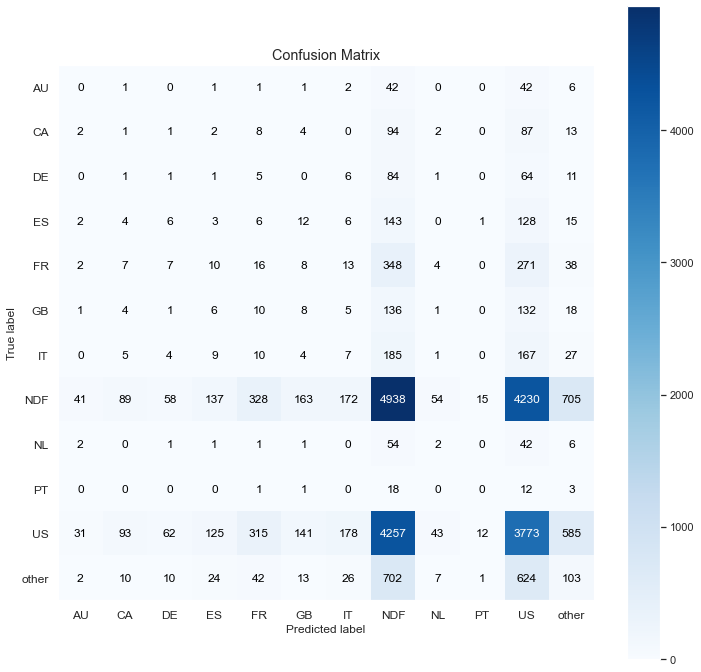

In [42]:
# Accuracy
acc_random = m.accuracy_score( y_test, yhat_random )
print( 'Accuracy: {}'.format( acc_random ) )

# Balanced Accuracy
balanced_acc_random = m.balanced_accuracy_score( y_test, yhat_random )
print( 'Balanced Accuracy: {}'.format( balanced_acc_random ) )

# Kappa Metrics
kappa_random = m.cohen_kappa_score( y_test, yhat_random )
print( 'Kappa Score: {}'.format( kappa_random ) )

# Classification report
print( m.classification_report( y_test, yhat_random ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat_random, normalize=False, figsize=(12,12) )

## 7.2. Neural Network - MLP

In [43]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [44]:
y_train_nn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [45]:
x_train.shape[1]

138

In [46]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 256, input_dim = x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 12, activation='softmax' ) )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
3067/3067 [==============================] - 4s 1ms/step - loss: 6.6224 - accuracy: 0.7313
Epoch 2/100
3067/3067 [==============================] - 4s 1ms/step - loss: 2.9045 - accuracy: 0.7483
Epoch 3/100
3067/3067 [==============================] - 4s 1ms/step - loss: 1.5275 - accuracy: 0.7743
Epoch 4/100
3067/3067 [==============================] - 4s 1ms/step - loss: 0.9815 - accuracy: 0.8037
Epoch 5/100
3067/3067 [==============================] - 4s 1ms/step - loss: 0.7353 - accuracy: 0.8311
Epoch 6/100
3067/3067 [==============================] - 3s 1ms/step - loss: 0.6599 - accuracy: 0.8376
Epoch 7/100
3067/3067 [==============================] - 4s 1ms/step - loss: 0.6470 - accuracy: 0.8379
Epoch 8/100
3067/3067 [==============================] - 4s 1ms/step - loss: 0.6426 - accuracy: 0.8385
Epoch 9/100
3067/3067 [==============================] - 4s 1ms/step - loss: 0.6413 - accuracy: 0.8386
Epoch 10/100
3067/3067 [==============================] - 4s 1ms/step - l

### 7.2.1. NN PERFORMANCE

In [47]:
# prediction
pred_nn = model.predict( x_test )

# invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape( 1,-1 )[0]


In [48]:
m.balanced_accuracy_score( y_test_nn, yhat_nn )

0.16664933263997225

Accuracy: 0.8374984711973582
Balanced Accuracy: 0.16664933263997225
Kappa Score: 0.7218011654056586
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        96
          CA       0.00      0.00      0.00       214
          DE       0.00      0.00      0.00       174
          ES       0.00      0.00      0.00       326
          FR       0.00      0.00      0.00       724
          GB       0.00      0.00      0.00       322
          IT       0.00      0.00      0.00       419
         NDF       1.00      1.00      1.00     10930
          NL       0.00      0.00      0.00       110
          PT       0.00      0.00      0.00        35
          US       0.71      1.00      0.83      9615
       other       0.00      0.00      0.00      1564

    accuracy                           0.84     24529
   macro avg       0.14      0.17      0.15     24529
weighted avg       0.72      0.84      0.77     24529



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

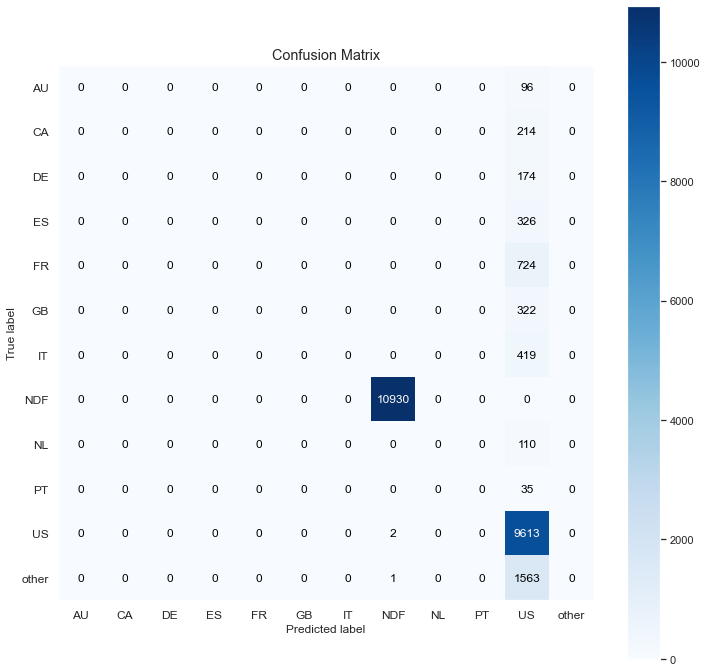

In [49]:
# Accuracy
acc_nn = m.accuracy_score( y_test_nn, yhat_nn )
print( 'Accuracy: {}'.format( acc_nn ) )

# Balanced Accuracy
balanced_acc_nn = m.balanced_accuracy_score( y_test_nn, yhat_nn )
print( 'Balanced Accuracy: {}'.format( balanced_acc_nn ) )

# Kappa Metrics
kappa_nn = m.cohen_kappa_score( y_test_nn, yhat_nn )
print( 'Kappa Score: {}'.format( kappa_nn ) )

# Classification report
print( m.classification_report( y_test_nn, yhat_nn ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12,12) )

### 7.2.2 NN PERFORMANCE - Cross Validation

In [ ]:
# generate k-dfold
num_folds = 5
kfold = ms.StratifiedKFold( n_splits=num_folds, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_acc_list = []

i = 1
for train_ix, val_ix in kfold.split( x_train, y_train ):
    print( 'Fold Number: {}/{}'.format( i, num_folds) )
    
    # get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # target hot-encondig
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform( y_train_fold.values.reshape( -1, 1 ) ).toarray()
    

    # model definition
    model = ml.Sequential()
    model.add( l.Dense( 256, input_dim=x_train.shape[1], activation='relu' ) )
    model.add( l.Dense( 11, activation='softmax' ) )

    # compile model
    model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

    # trainijg model
    model.fit( x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=0 )

    # prediction
    pred_nn = model.predict( x_val_fold )
    yhat_nn = ohe.inverse_transform( pred_nn )
    
    # prepare data
    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape( 1, -1)[0]

    # metrics
    ## Balanced Accuracy
    balanced_acc_nn = m.balanced_accuracy_score( y_test_nn, yhat_nn )
    balanced_acc_list.append( balanced_acc_nn )
    
    ## KappaMetrics
    kappa_acc_nn = m.cohen_kappa_score( y_test_nn, yhat_nn )
    kappa_acc_list.append( kappa_acc_nn )
    
    i = i + 1
    

In [ ]:
print( 'Avg Balanced Accuracy: {} +/- {}'.format( np.round( np.mean( balanced_acc_list ), 2 ), 
                                                 np.round( np.std( balanced_acc_list ), 4 ) ) )
print( 'Avg Kappa: {} +/- {}'.format( np.round( np.mean( kappa_acc_list ), 3 ), 
                                                 np.round( np.std( kappa_acc_list ), 4 ) ) )